In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

In [20]:
data_path = os.path.join('..', 'data', 'iris_data.csv')
df = pd.read_csv(data_path)
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [21]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression metrics:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [22]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree metrics:")
print(classification_report(y_test, y_pred_dt))

Decision Tree metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [23]:
results = pd.DataFrame({
    "Model": ["Logistic Regression","Decision Tree"],
    "Accuracy": [acc_lr, acc_dt]
})
print(results)

                 Model  Accuracy
0  Logistic Regression       1.0
1        Decision Tree       1.0


In [24]:
lr_importance = lr.coef_[0]
lr_importance_abs = np.abs(lr_importance)
dt_importance = dt.feature_importances_
feature = X.columns
imporance_df = pd.DataFrame({
    "Feature": feature,
    "Logistic Regression (abs coef)": lr_importance_abs,
    "Decision Tree (importance)": dt_importance
})
print(imporance_df)

             Feature  Logistic Regression (abs coef)  \
0  sepal length (cm)                        0.405386   
1   sepal width (cm)                        0.868921   
2  petal length (cm)                        2.277875   
3   petal width (cm)                        0.956801   

   Decision Tree (importance)  
0                    0.000000  
1                    0.019110  
2                    0.893264  
3                    0.087626  


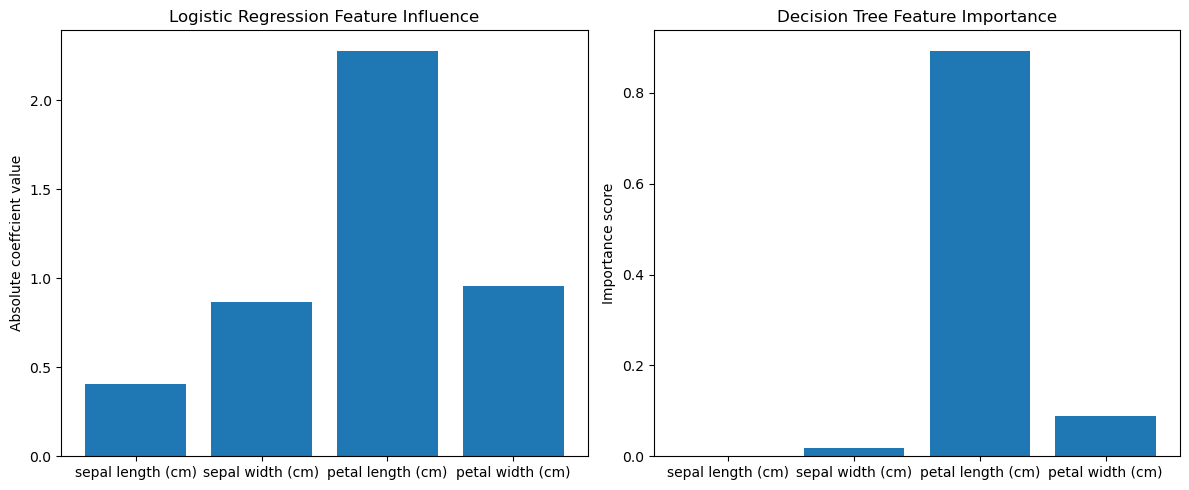

In [25]:
feature_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
figs, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].bar(feature_cols, lr_importance_abs)
axes[0].set_title("Logistic Regression Feature Influence")
axes[0].set_ylabel("Absolute coeffcient value")
axes[1].bar(feature_cols, dt_importance)
axes[1].set_title("Decision Tree Feature Importance")
axes[1].set_ylabel("Importance score")
plt.tight_layout()
plt.show()